# 교통, 문화, 통신 빅데이터 플랫폼 융합 분석 경진대회

1. 주제
- 교통/문화/통신 기반의 지역 경제 활성화를 위한 빅데이터 분석.

2. 배경
- COVID-19가 장기간 지속됨에 따라 시민들의 생활 패턴, 지역 경제에 큰 영향을 미치고 있습니다. 한편 지난해 디지털 뉴딜 사업이 시작된 이후 교통/문화/통신 등 산업 분야별로 데이터 공급이 확대되고 있으며, 이와 관련된 데이터를 분석하여 도출해낸 인사이트는 지역 경제 활성화에 큰 역할을 할 수 있습니다.
- 본 대회는 과기정통부의 빅데이터 플랫폼 및 네트워크 구축 사업으로써 2019년부터 2021년까지의 도시(강릉, 목포, 전주) 관광 인구, 철도 유동 인구 데이터를 비롯하여 전국의 문화/여가 시설 데이터를 제공합니다. 다양한 데이터의 융합 분석을 통해 과학적 기반 정책과 서비스를 추진/발굴 할 수 있을 것으로 예상합니다.

In [102]:
import pandas as pd
import numpy as np

import os
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [9]:
culture_path = '/content/drive/MyDrive/Colab Notebooks/data/platform/한국문화정보원)플랫폼통합경진대회 데이터/데이터/'
# /content/drive/MyDrive/Colab Notebooks/data/platform/한국문화정보원)플랫폼통합경진대회 데이터/컬럼정의서
kt_path = '/content/drive/MyDrive/Colab Notebooks/data/platform/KT)플랫폼통합경진대회 데이터/'

In [14]:
culture_list = os.listdir(culture_path)
kt_path_list = os.listdir(kt_path)
print(kt_path_list)
kt_path_li =[]
for k in kt_path_list:
    if '.xlsx' not in k:
        kt_path_li.append(k)

['(KT)플랫폼통합경진대회_코드정의서.xlsx', '(KT)플랫폼통합경진대회_테이블정의서_관광_시군구.xlsx', '(KT)플랫폼통합경진대회_테이블정의서_관광_행정동.xlsx', '(KT)플랫폼통합경진대회_전주시_행정동', '(KT)플랫폼통합경진대회_강릉시_행정동', '(KT)플랫폼통합경진대회_강릉시_시군구', '(KT)플랫폼통합경진대회_목포시_행정동', '(KT)플랫폼통합경진대회_전주시_시군구', '(KT)플랫폼통합경진대회_목포시_시군구']


In [101]:
kt_path_li
kt_file = []
for k in kt_path_li:
#     print(os.listdir(kt_path+k))
#     print(k)
    klist = []
    kdir = os.listdir(kt_path+k)
    print(kdir)
    for i in kdir:
#         print(kt_path+k+'/'+i)
        kdf = pd.read_csv(r'{}{}/{}'.format(kt_path,k, i), encoding='cp949')
        kdf['ETL_YMD'] = kdf['ETL_YMD'].apply(lambda x: datetime.date(datetime.strptime(str(x), r'%Y%m%d')))
        # kdf['day'] = pd.to_datetime(kdf['ETL_YMD']).dt.dayofweek
        # kdf['week'] = pd.to_datetime(kdf['ETL_YMD']).dt.week
        # kdf['month'] = pd.to_datetime(kdf['ETL_YMD']).dt.month
        # kdf['year'] = pd.to_datetime(kdf['ETL_YMD']).dt.year

        klist.append(kdf)
    kt_file.append(klist)
kt_file

['(KT)플랫폼통합경진대회_전주시_행정동_1.일별관광객수.csv', '(KT)플랫폼통합경진대회_전주시_행정동_2.성연령별관광객수.csv', '(KT)플랫폼통합경진대회_전주시_행정동_3.시간대별관광객수.csv', '(KT)플랫폼통합경진대회_전주시_행정동_4.국적별관광객수.csv', '(KT)플랫폼통합경진대회_전주시_행정동_5.국적별시간대별관광객수.csv', '(KT)플랫폼통합경진대회_전주시_행정동_6.거주지기반유입비율(2019년).csv', '(KT)플랫폼통합경진대회_전주시_행정동_6.거주지기반유입비율(2020년).csv', '(KT)플랫폼통합경진대회_전주시_행정동_6.거주지기반유입비율(2021년).csv', '(KT)플랫폼통합경진대회_전주시_행정동_7.24시간이후이동비율(외지인).csv', '(KT)플랫폼통합경진대회_전주시_행정동_8.24시간이후유출비율(외국인).csv']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


['(KT)플랫폼통합경진대회_강릉시_행정동_1.일별관광객수.csv', '(KT)플랫폼통합경진대회_강릉시_행정동_2.성연령별관광객수.csv', '(KT)플랫폼통합경진대회_강릉시_행정동_3.시간대별관광객수.csv', '(KT)플랫폼통합경진대회_강릉시_행정동_4.국적별관광객수.csv', '(KT)플랫폼통합경진대회_강릉시_행정동_5.국적별시간대별관광객수.csv', '(KT)플랫폼통합경진대회_강릉시_행정동_6.거주지기반유입비율.csv', '(KT)플랫폼통합경진대회_강릉시_행정동_7.24시간이후이동비율(외지인).csv', '(KT)플랫폼통합경진대회_강릉시_행정동_8.24시간이후유출비율(외국인).csv']
['(KT)플랫폼통합경진대회_강릉시_시군구_4.국적별관광객수.csv', '(KT)플랫폼통합경진대회_강릉시_시군구_1.일별관광객수.csv', '(KT)플랫폼통합경진대회_강릉시_시군구_3.시간대별관광객수.csv', '(KT)플랫폼통합경진대회_강릉시_시군구_2.성연령별관광객수.csv', '(KT)플랫폼통합경ᄌ

[[         ETL_YMD SIDO_NM  SIDO_CD   SGG_NM  ...  day week  month  year
  0     2019-03-01    전라북도       45  전주시 덕진구  ...    4    9      3  2019
  1     2019-03-01    전라북도       45  전주시 덕진구  ...    4    9      3  2019
  2     2019-03-01    전라북도       45  전주시 덕진구  ...    4    9      3  2019
  3     2019-03-01    전라북도       45  전주시 덕진구  ...    4    9      3  2019
  4     2019-03-01    전라북도       45  전주시 덕진구  ...    4    9      3  2019
  ...          ...     ...      ...      ...  ...  ...  ...    ...   ...
  9655  2021-05-31    전라북도       45  전주시 완산구  ...    0   22      5  2021
  9656  2021-05-31    전라북도       45  전주시 완산구  ...    0   22      5  2021
  9657  2021-05-31    전라북도       45  전주시 완산구  ...    0   22      5  2021
  9658  2021-05-31    전라북도       45  전주시 완산구  ...    0   22      5  2021
  9659  2021-05-31    전라북도       45  전주시 완산구  ...    0   22      5  2021
  
  [9660 rows x 14 columns],
             ETL_YMD SIDO_NM  SIDO_CD   SGG_NM  ...  day week  month  year
  0       2019-03-

In [15]:
c_list = []
for i in culture_list:
  # print(i)
  df = pd.read_csv(culture_path+i)
#     try :
#         if df.sgnr_nm:
#             df = df.query('sgnr_nm == "강릉시" or sgnr_nm == "목포시" or sgnr_nm == "전주시"')
#             c_list.append(df)
#         elif df.sgg_nm:
#             df = df.query('sgg_nm == "강릉시" or sgg_nm == "목포시" or sgg_nm == "전주시"')
#             c_list.append(df)
#     except Exception as e:
#         print(e, '강릉시/목포시/전주시 데이터가 아닙니다.')
  c_list.append(df)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
# len(c_list[1][c_list[1].sgnr_nm == '강릉시'])/len(c_list[1])

for i, c in enumerate(c_list):
#     print(i, c)
    print(len(c_list[i])) # 각 df 의 길이
    if 'sgnr_nm' in c.columns:
        print('{} sgnr 강릉시의 비율은 {}'.format(i,len(c.query('sgnr_nm == "강릉시"'))/len(c)))
    if 'sgg_nm' in c.columns:
        print('{} {} 강릉시의 비율은 {}'.format(i,'sgg',len(c.query('sgg_nm == "강릉시"'))/len(c)))
    if 'SIGNGU_NM' in c.columns:
        print('{} {} 강릉시의 비율은 {}'.format(i, 'SIGNGU_NM',len(c.query('SIGNGU_NM == "강릉시"'))/len(c)))
    if 'signgu_nm' in c.columns:
        print('{} {} 강릉시의 비율은 {}'.format(i, 'signgu_nm',len(c.query('signgu_nm == "강릉시"'))/len(c))) # 17
# SIGNGU_NM
# signgu_nm
        #     print(len(c.query('sgg_nm == "강릉시" or sgnr_nm=="강릉시"')))




12478
0 sgnr 강릉시의 비율은 0.008655233210450393
8606
1 sgg 강릉시의 비율은 0.0033697420404369045
37213
2 sgg 강릉시의 비율은 0.008437911482546422
658
3 sgnr 강릉시의 비율은 0.00911854103343465
85684
4 sgg 강릉시의 비율은 0.002007375939498623
23611
5 signgu_nm 강릉시의 비율은 0.015670661979585786
3120
6 sgnr 강릉시의 비율은 0.010256410256410256
47369
7 sgg 강릉시의 비율은 0.007916569908590005
897
8 sgnr 강릉시의 비율은 0.021181716833890748
168503
9 sgg 강릉시의 비율은 0.005655685655448271
74776
10 sgg 강릉시의 비율은 0.006178452979565636
5281
11 SIGNGU_NM 강릉시의 비율은 0.004923309979170612
92413
12 sgg 강릉시의 비율은 0.02062480386958545
95417
13 sgg 강릉시의 비율은 0.006183384512193844
25494
14 SIGNGU_NM 강릉시의 비율은 0.005766062602965404
594
15 SIGNGU_NM 강릉시의 비율은 0.003367003367003367
2132
16 SIGNGU_NM 강릉시의 비율은 0.00046904315196998124
2586
17 SIGNGU_NM 강릉시의 비율은 0.004640371229698376
405
18 SIGNGU_NM 강릉시의 비율은 0.0
7987
19 SIGNGU_NM 강릉시의 비율은 0.0015024414673844998
48483
20 SIGNGU_NM 강릉시의 비율은 0.0036920157581007778
950
21 sgnr 강릉시의 비율은 0.00631578947368421
1211
22 sgg 강릉시의 비율은 0.005780346820

### 날짜 컬럼 데이터 형 변경


In [70]:
from datetime import datetime
# kt_file[0][6] # 전주시
kt_file[2][6]['ETL_YMD'] = kt_file[0][6]['ETL_YMD'].apply(lambda x: datetime.date(datetime.strptime(str(x), r'%Y%m%d')))
kt_file[2][6].groupby('ETL_YMD')['RESD_INFO'].value_counts()

ETL_YMD   RESD_INFO   
20190301  강원도 강릉시         1
          강원도 고성군         1
          강원도 동해시         1
          강원도 삼척시         1
          강원도 속초시         1
                         ..
20210531  충청북도 청주시 상당구    1
          충청북도 청주시 서원구    1
          충청북도 청주시 청원구    1
          충청북도 청주시 흥덕구    1
          충청북도 충주시        1
Name: RESD_INFO, Length: 60795, dtype: int64

In [72]:
print(type(kt_file[2][6]['ETL_YMD'][0]))
# kt_file[0][6]['ETL_YMD'].dt

# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# datetime.day(kt_file[0][6]['ETL_YMD'])
# df['day'] = [k for k in df['DATE'].dt.dayofweek] ## 요일 칼럼

<class 'numpy.int64'>


In [73]:
kt_file[2][6]['ETL_YMD'][0] # datetime.date(2020, 3, 1) - datetime.date 타입으로 형 변경 확인

20190301

In [77]:
df = kt_file[2][6].copy()
df['ETL_YMD'] = df['ETL_YMD'].apply(lambda x: datetime.date(datetime.strptime(str(x), r'%Y%m%d')))
df['week'] = pd.to_datetime(df['ETL_YMD']).dt.week
df['month'] = pd.to_datetime(df['ETL_YMD']).dt.month
df['year'] = pd.to_datetime(df['ETL_YMD']).dt.year
df['day'] = pd.to_datetime(df['ETL_YMD']).dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
df

,ETL_YMD,SGG_NM,SGG_CD,RESD_INFO,RESD_SGG_CD,O_RATE_CNT,day,week,month,year
0,2019-03-01,강릉시,42150,강원도 강릉시,42150,36.885100,4,9,3,2019
1,2019-03-01,강릉시,42150,강원도 속초시,42210,4.291718,4,9,3,2019
2,2019-03-01,강릉시,42150,강원도 평창군,42760,3.883265,4,9,3,2019
3,2019-03-01,강릉시,42150,강원도 횡성군,42730,2.533594,4,9,3,2019
4,2019-03-01,강릉시,42150,강원도 양양군,42830,2.492157,4,9,3,2019
...,...,...,...,...,...,...,...,...,...,...
60790,2021-05-31,강릉시,42150,전라남도 담양군,46710,0.006469,0,22,5,2021
60791,2021-05-31,강릉시,42150,인천광역시 옹진군,28720,0.006469,0,22,5,2021
60792,2021-05-31,강릉시,42150,전라남도 신안군,46910,0.006469,0,22,5,2021
60793,2021-05-31,강릉시,42150,부산광역시 북구,26320,0.006469,0,22,5,2021


### 요일별 분류 & 주별 & 월별

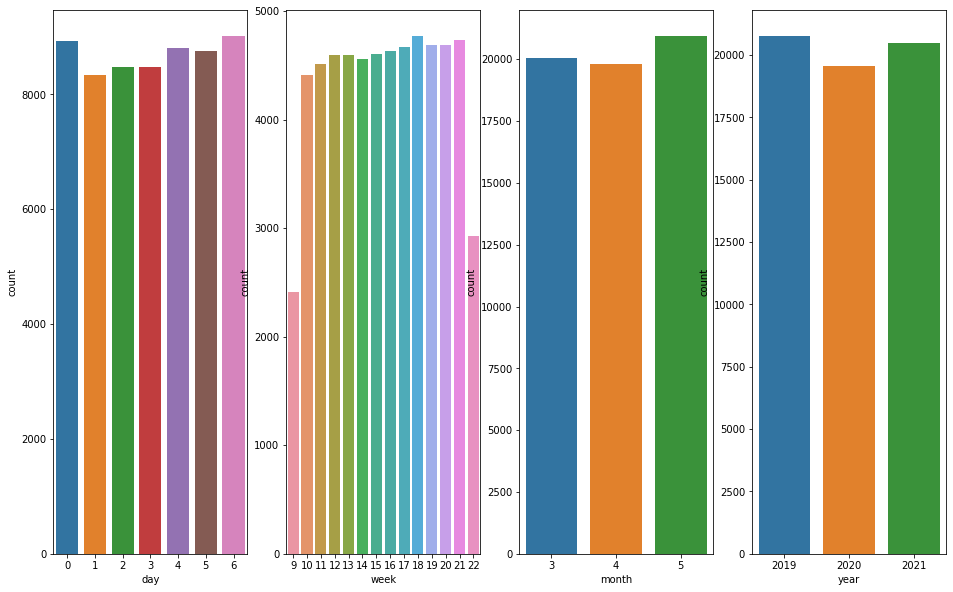

In [81]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols = 4, figsize = (16, 10))
sns.countplot(data = df, x='day', ax = ax1)
sns.countplot(data = df, x='week', ax = ax2)
sns.countplot(data = df, x='month', ax = ax3)
sns.countplot(data = df, x='year', ax = ax4)

강릉시 행정 시군구별 데이터
- 월요일 방문객이 많은편, 이후 화요일 급감 후 점차적으로 증가하고 일요일에 가장많음
- 연도별로는 2020년에 감소했지만 2021년 다시 회복

> 특이점: 
1. 월요일의 방문객이 많음, 
2. 월별로 끊켜진 자료라서 첫째주와 마지막주의 방문객이 적게 카운팅됨
3. 방문객이 4월에는 감소 후 5월 증가


In [60]:
kt_file[0][6]

,ETL_YMD,SGG_NM,SGG_CD,ADMDONG_NM,ADMDONG_CD,RESD_INFO,RESD_SGG_CD,O_RATE_CNT,day
0,2020-03-01,전주시 완산구,45111,중앙동,45111510,전라북도 전주시 덕진구,45113,50.834971,6
1,2020-03-01,전주시 완산구,45111,중앙동,45111510,전라북도 완주군,45710,6.483301,6
2,2020-03-01,전주시 완산구,45111,중앙동,45111510,전라북도 익산시,45140,5.402750,6
3,2020-03-01,전주시 완산구,45111,중앙동,45111510,전라북도 군산시,45130,4.174853,6
4,2020-03-01,전주시 완산구,45111,중앙동,45111510,전라북도 김제시,45210,3.143418,6
...,...,...,...,...,...,...,...,...,...
417381,2020-05-31,전주시 덕진구,45113,혁신동,45113670,경기도 광명시,41210,0.144092,6
417382,2020-05-31,전주시 덕진구,45113,혁신동,45113670,강원도 강릉시,42150,0.144092,6
417383,2020-05-31,전주시 덕진구,45113,혁신동,45113670,대구광역시 북구,27230,0.144092,6
417384,2020-05-31,전주시 덕진구,45113,혁신동,45113670,경기도 의정부시,41150,0.144092,6


In [83]:
df

,ETL_YMD,SGG_NM,SGG_CD,RESD_INFO,RESD_SGG_CD,O_RATE_CNT,day,week,month,year
0,2019-03-01,강릉시,42150,강원도 강릉시,42150,36.885100,4,9,3,2019
1,2019-03-01,강릉시,42150,강원도 속초시,42210,4.291718,4,9,3,2019
2,2019-03-01,강릉시,42150,강원도 평창군,42760,3.883265,4,9,3,2019
3,2019-03-01,강릉시,42150,강원도 횡성군,42730,2.533594,4,9,3,2019
4,2019-03-01,강릉시,42150,강원도 양양군,42830,2.492157,4,9,3,2019
...,...,...,...,...,...,...,...,...,...,...
60790,2021-05-31,강릉시,42150,전라남도 담양군,46710,0.006469,0,22,5,2021
60791,2021-05-31,강릉시,42150,인천광역시 옹진군,28720,0.006469,0,22,5,2021
60792,2021-05-31,강릉시,42150,전라남도 신안군,46910,0.006469,0,22,5,2021
60793,2021-05-31,강릉시,42150,부산광역시 북구,26320,0.006469,0,22,5,2021


## 외국인 관광객 데이터 확인


In [100]:
kt_file[2][4]
# sns.countplot(data = kt_file[2][4], x='')

,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,TIMEZN_DIV_CD,CNTRY_NM,CNTRY_CD,F_CNT
0,20190301,강원도,42,강릉시,42150,0,대만,466,1
1,20190301,강원도,42,강릉시,42150,0,독일,262,-
2,20190301,강원도,42,강릉시,42150,0,러시아,250,1
3,20190301,강원도,42,강릉시,42150,0,미국,310,1
4,20190301,강원도,42,강릉시,42150,0,인도,404,1
...,...,...,...,...,...,...,...,...,...
50078,20210531,강원도,42,강릉시,42150,23,GCC,980,-
50079,20210531,강원도,42,강릉시,42150,23,기타,999,-
50080,20210531,강원도,42,강릉시,42150,23,미국,310,-
50081,20210531,강원도,42,강릉시,42150,23,베트남,452,-


In [103]:
kt_file[2][4].query('ETL_YMD == "20190301"')
kt_file[2][4]

,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,TIMEZN_DIV_CD,CNTRY_NM,CNTRY_CD,F_CNT,day,week,month,year
0,2019-03-01,강원도,42,강릉시,42150,0,대만,466,1,4,9,3,2019
1,2019-03-01,강원도,42,강릉시,42150,0,독일,262,-,4,9,3,2019
2,2019-03-01,강원도,42,강릉시,42150,0,러시아,250,1,4,9,3,2019
3,2019-03-01,강원도,42,강릉시,42150,0,미국,310,1,4,9,3,2019
4,2019-03-01,강원도,42,강릉시,42150,0,인도,404,1,4,9,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50078,2021-05-31,강원도,42,강릉시,42150,23,GCC,980,-,0,22,5,2021
50079,2021-05-31,강원도,42,강릉시,42150,23,기타,999,-,0,22,5,2021
50080,2021-05-31,강원도,42,강릉시,42150,23,미국,310,-,0,22,5,2021
50081,2021-05-31,강원도,42,강릉시,42150,23,베트남,452,-,0,22,5,2021


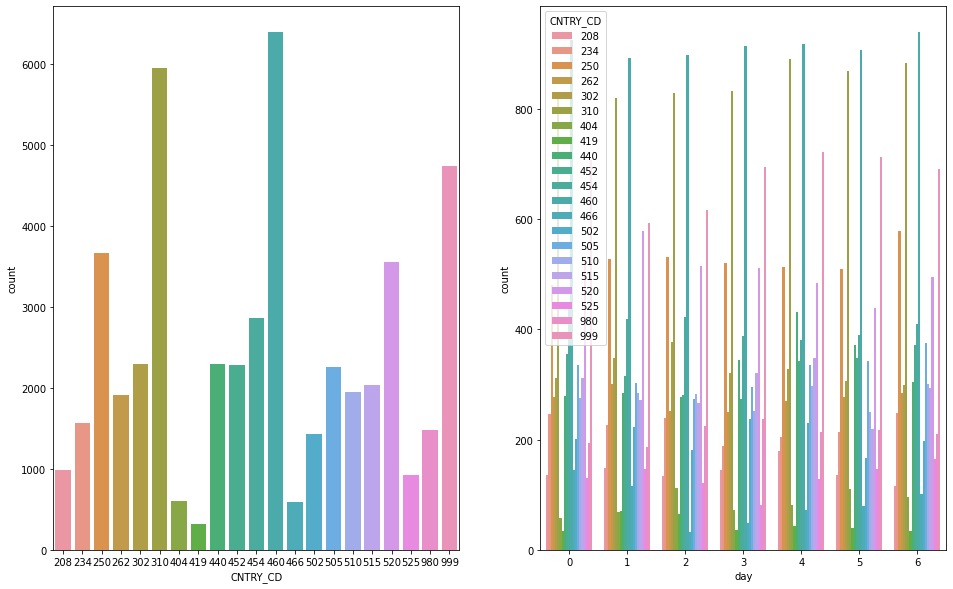

In [108]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols =2, figsize = (16, 10))
sns.countplot(data = kt_file[2][4],  x='CNTRY_CD', ax = ax1)
sns.countplot(data = kt_file[2][4], x='day', hue='CNTRY_CD', ax= ax2)

- 강릉시의 국가별 방문객 / 요일별 국가별 방문객

- 중국 -> 미국 -> 기타 -> 러시아 -> 태국 순으로 많음

In [113]:
kt_file[2][4].query('CNTRY_CD == 520')
## 중국 미국 순

,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,TIMEZN_DIV_CD,CNTRY_NM,CNTRY_CD,F_CNT,day,week,month,year
16,2019-03-01,강원도,42,강릉시,42150,1,태국,520,1,4,9,3,2019
27,2019-03-01,강원도,42,강릉시,42150,2,태국,520,1,4,9,3,2019
38,2019-03-01,강원도,42,강릉시,42150,3,태국,520,1,4,9,3,2019
47,2019-03-01,강원도,42,강릉시,42150,4,태국,520,1,4,9,3,2019
56,2019-03-01,강원도,42,강릉시,42150,5,태국,520,1,4,9,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49474,2021-05-27,강원도,42,강릉시,42150,17,태국,520,-,3,21,5,2021
49484,2021-05-27,강원도,42,강릉시,42150,18,태국,520,-,3,21,5,2021
49493,2021-05-27,강원도,42,강릉시,42150,19,태국,520,-,3,21,5,2021
49502,2021-05-27,강원도,42,강릉시,42150,20,태국,520,-,3,21,5,2021


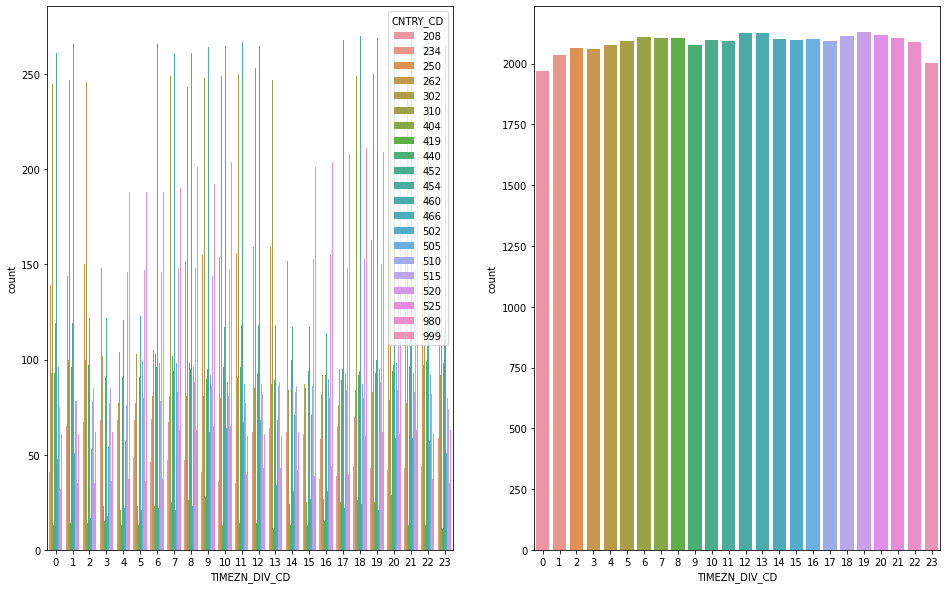

In [117]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(16,10))
sns.countplot(data = kt_file[2][4], x='TIMEZN_DIV_CD', hue='CNTRY_CD', ax=ax1)
sns.countplot(data = kt_file[2][4], x='TIMEZN_DIV_CD', ax=ax2)

In [120]:
kt_file[2][2]
mdf = pd.merge(kt_file[2][2], kt_file[2][4], on=['ETL_YMD', 'TIMEZN_DIV_CD'])

In [124]:
kt_file[2][2]
time_df = kt_file[2][2].copy()

In [127]:
import re

time_df['I_CNT']=time_df['I_CNT'].apply(lambda x: int(x.replace(',','')))
time_df['O_CNT']=time_df['O_CNT'].apply(lambda x: int(x.replace(',',''))) 
time_df['S_CNT'] = time_df['I_CNT'] - time_df['O_CNT']

In [128]:
time_df

,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,TIMEZN_DIV_CD,I_CNT,O_CNT,F_CNT,day,week,month,year,S_CNT
0,2019-03-01,강원도,42,강릉시,42150,0,3672,4280,11,4,9,3,2019,-608
1,2019-03-01,강원도,42,강릉시,42150,1,3939,4535,12,4,9,3,2019,-596
2,2019-03-01,강원도,42,강릉시,42150,2,3693,4619,13,4,9,3,2019,-926
3,2019-03-01,강원도,42,강릉시,42150,3,3588,4673,14,4,9,3,2019,-1085
4,2019-03-01,강원도,42,강릉시,42150,4,3593,4756,14,4,9,3,2019,-1163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,2021-05-31,강원도,42,강릉시,42150,19,8809,2537,-,0,22,5,2021,6272
6620,2021-05-31,강원도,42,강릉시,42150,20,8105,2495,-,0,22,5,2021,5610
6621,2021-05-31,강원도,42,강릉시,42150,21,7164,2380,-,0,22,5,2021,4784
6622,2021-05-31,강원도,42,강릉시,42150,22,6174,2247,-,0,22,5,2021,3927


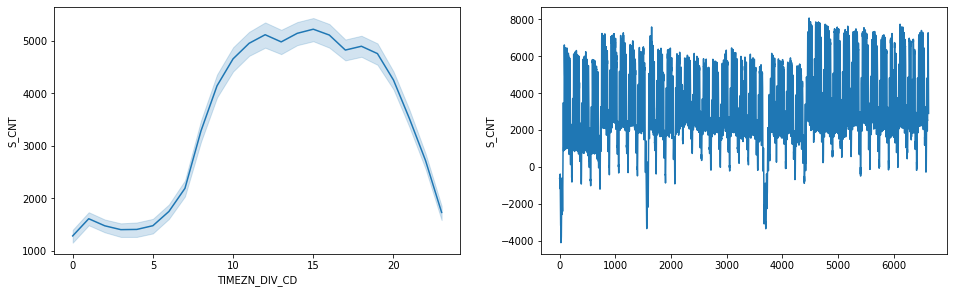

In [133]:
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.lineplot(data =time_df, y='S_CNT', x="TIMEZN_DIV_CD")
plt.subplot(222)
sns.lineplot(data =time_df, y='S_CNT', x=time_df.index)

In [139]:
time_df.query('S_CNT < -2000')['ETL_YMD'].unique()

array([datetime.date(2019, 3, 1), datetime.date(2019, 3, 2),
       datetime.date(2019, 3, 3), datetime.date(2019, 5, 4),
       datetime.date(2019, 5, 5), datetime.date(2019, 5, 6),
       datetime.date(2020, 4, 30), datetime.date(2020, 5, 1),
       datetime.date(2020, 5, 2), datetime.date(2020, 5, 3)], dtype=object)

IN보다 OUT이 큰 경우 중 그 차이가 큰(-2000명 이상)인 경우

>
1. 2019년 3월 1일 ~ 2019년 3월 3일
2. 2019년 5월 4일 ~ 2019년 5월 6일
3. 2020년 4월 30일 ~ 2020년 5월 3일


In [144]:
time_df.query('S_CNT > 7500')['ETL_YMD'].unique()

array([datetime.date(2019, 5, 8), datetime.date(2021, 3, 3),
       datetime.date(2021, 3, 4), datetime.date(2021, 3, 5),
       datetime.date(2021, 3, 8), datetime.date(2021, 3, 9),
       datetime.date(2021, 3, 10), datetime.date(2021, 3, 11),
       datetime.date(2021, 3, 15), datetime.date(2021, 3, 16),
       datetime.date(2021, 3, 17), datetime.date(2021, 3, 24),
       datetime.date(2021, 4, 1), datetime.date(2021, 4, 13),
       datetime.date(2021, 5, 10), datetime.date(2021, 5, 11),
       datetime.date(2021, 5, 12)], dtype=object)

OUT보다 IN이 큰 경우 중 그 차이가 큰(7500명 이상)인 경우는 대부분 2021년

([datetime.date(2019, 5, 8), datetime.date(2021, 3, 3),
       datetime.date(2021, 3, 4), datetime.date(2021, 3, 5),
       datetime.date(2021, 3, 8), datetime.date(2021, 3, 9),
       datetime.date(2021, 3, 10), datetime.date(2021, 3, 11),
       datetime.date(2021, 3, 15), datetime.date(2021, 3, 16),
       datetime.date(2021, 3, 17), datetime.date(2021, 3, 24),
       datetime.date(2021, 4, 1), datetime.date(2021, 4, 13),
       datetime.date(2021, 5, 10), datetime.date(2021, 5, 11),
       datetime.date(2021, 5, 12)], dtype=object)

-> 2020년에 여행을 가지 못해서 그런가?


In [152]:
np.where(time_df.S_CNT == time_df.S_CNT.min())
time_df.iloc[23]

ETL_YMD          2019-03-01
SIDO_NM                 강원도
SIDO_CD                  42
SGG_NM                  강릉시
SGG_CD                42150
TIMEZN_DIV_CD            23
I_CNT                  4060
O_CNT                  8168
F_CNT                    17
day                       4
week                      9
month                     3
year                   2019
S_CNT                 -4108
Name: 23, dtype: object

In [162]:
def make_scnt(df):
  df['I_CNT']=df['I_CNT'].apply(lambda x: int(x.replace(',','')))
  df['O_CNT']=df['O_CNT'].apply(lambda x: int(x.replace(',',''))) 
  df['S_CNT'] = df['I_CNT'] - df['O_CNT']
  return df

In [163]:
make_scnt(kt_file[2][1])
kt_file[2][1]

,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,I_CNT,O_CNT,F_CNT,day,week,month,year,S_CNT
0,2019-03-01,강원도,42,강릉시,42150,136301,179498,328,4,9,3,2019,-43197
1,2019-03-02,강원도,42,강릉시,42150,136497,195255,345,5,9,3,2019,-58758
2,2019-03-03,강원도,42,강릉시,42150,135902,121730,306,6,9,3,2019,14172
3,2019-03-04,강원도,42,강릉시,42150,151518,63298,300,0,10,3,2019,88220
4,2019-03-05,강원도,42,강릉시,42150,148904,62125,319,1,10,3,2019,86779
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2021-05-27,강원도,42,강릉시,42150,182644,61138,75,3,21,5,2021,121506
272,2021-05-28,강원도,42,강릉시,42150,181517,75810,50,4,21,5,2021,105707
273,2021-05-29,강원도,42,강릉시,42150,171720,123526,20,5,21,5,2021,48194
274,2021-05-30,강원도,42,강릉시,42150,168581,112858,11,6,21,5,2021,55723


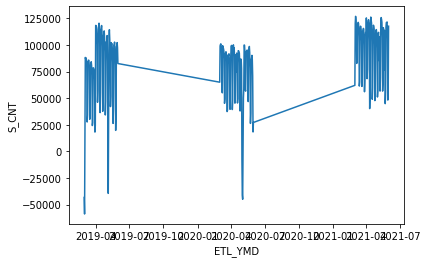

In [164]:
sns.lineplot(data = kt_file[2][1], x='ETL_YMD', y='S_CNT')

In [165]:
kt_file[2][1].query('S_CNT < -50000')

,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,I_CNT,O_CNT,F_CNT,day,week,month,year,S_CNT
1,2019-03-02,강원도,42,강릉시,42150,136497,195255,345,5,9,3,2019,-58758


In [167]:
kt_file[2][1]['I_CNT'].sum() - kt_file[2][1]['O_CNT'].sum()

22612384

### I_CNT 가 O_CNT 의 총합보다 많다...?
이게 어떻게 된 일일까?

가정:
1. 3월과 5월까지의 데이터만 있으므로, 그 이전의 데이터와 그 이후의 데이터가 제대로 집계되지 않은 데이터 이기 때문


In [174]:
kt_file[2][1]['F_CNT']=kt_file[2][1]['F_CNT'].apply(lambda x: int(x.replace(',','')) if x != ' - ' else 0) 
kt_file[2][1]['f_ratio'] = round(kt_file[2][1]['F_CNT']/kt_file[2][1]['I_CNT'], 4) *100
kt_file[2][1]

,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,I_CNT,O_CNT,F_CNT,day,week,month,year,S_CNT,f_ratio
0,2019-03-01,강원도,42,강릉시,42150,136301,179498,328,4,9,3,2019,-43197,0.24
1,2019-03-02,강원도,42,강릉시,42150,136497,195255,345,5,9,3,2019,-58758,0.25
2,2019-03-03,강원도,42,강릉시,42150,135902,121730,306,6,9,3,2019,14172,0.23
3,2019-03-04,강원도,42,강릉시,42150,151518,63298,300,0,10,3,2019,88220,0.20
4,2019-03-05,강원도,42,강릉시,42150,148904,62125,319,1,10,3,2019,86779,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2021-05-27,강원도,42,강릉시,42150,182644,61138,75,3,21,5,2021,121506,0.04
272,2021-05-28,강원도,42,강릉시,42150,181517,75810,50,4,21,5,2021,105707,0.03
273,2021-05-29,강원도,42,강릉시,42150,171720,123526,20,5,21,5,2021,48194,0.01
274,2021-05-30,강원도,42,강릉시,42150,168581,112858,11,6,21,5,2021,55723,0.01


In [177]:
np.where( kt_file[2][1]['F_CNT'] == kt_file[2][1]['F_CNT'].max())
kt_file[2][1].iloc[41]

ETL_YMD    2019-04-11
SIDO_NM           강원도
SIDO_CD            42
SGG_NM            강릉시
SGG_CD          42150
I_CNT          168263
O_CNT           51002
F_CNT             903
day                 3
week               15
month               4
year             2019
S_CNT          117261
f_ratio          0.54
Name: 41, dtype: object

In [179]:
kt_file[2][1][kt_file[2][1]['f_ratio'] == kt_file[2][1]['f_ratio'].max()]

,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,I_CNT,O_CNT,F_CNT,day,week,month,year,S_CNT,f_ratio
41,2019-04-11,강원도,42,강릉시,42150,168263,51002,903,3,15,4,2019,117261,0.54


### 외국인 관광객을 비율로 볼 경우 외국인 관광객이 가장 많은 때에도 1 %에도 미치지 못함 
외국인 관광객이 큰 의미가 없다고 생각할 수 있음


In [187]:
round(len(c_list[0].query('sgnr_nm =="강릉시"'))/ len(c_list[0]),4 )*100
## 강릉시의 주차장 비율
# c_list[0]

0.8699999999999999

In [192]:
round(len(c_list[1].query('sgg_nm =="강릉시"'))/ len(c_list[1]),4 )*100
## 강릉시의 공원 비율
# c_list[1]

0.33999999999999997

In [196]:
make_scnt(kt_file[2][3])
kt_file[2][3]

,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,SEX_DIV_CD,AGE_DIV_CD,I_CNT,O_CNT,day,week,month,year,S_CNT
0,2019-03-01,강원도,42,강릉시,42150,F,A0009,722,1163,4,9,3,2019,-441
1,2019-03-01,강원도,42,강릉시,42150,F,A1019,5676,8227,4,9,3,2019,-2551
2,2019-03-01,강원도,42,강릉시,42150,F,A2029,9425,26287,4,9,3,2019,-16862
3,2019-03-01,강원도,42,강릉시,42150,F,A3039,7867,17847,4,9,3,2019,-9980
4,2019-03-01,강원도,42,강릉시,42150,F,A4049,12564,17778,4,9,3,2019,-5214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,2021-05-31,강원도,42,강릉시,42150,M,A3039,11013,6195,0,22,5,2021,4818
4412,2021-05-31,강원도,42,강릉시,42150,M,A4049,15686,6012,0,22,5,2021,9674
4413,2021-05-31,강원도,42,강릉시,42150,M,A5059,20401,6631,0,22,5,2021,13770
4414,2021-05-31,강원도,42,강릉시,42150,M,A6069,16746,4866,0,22,5,2021,11880


### 요일별 성별/연령대별 확인


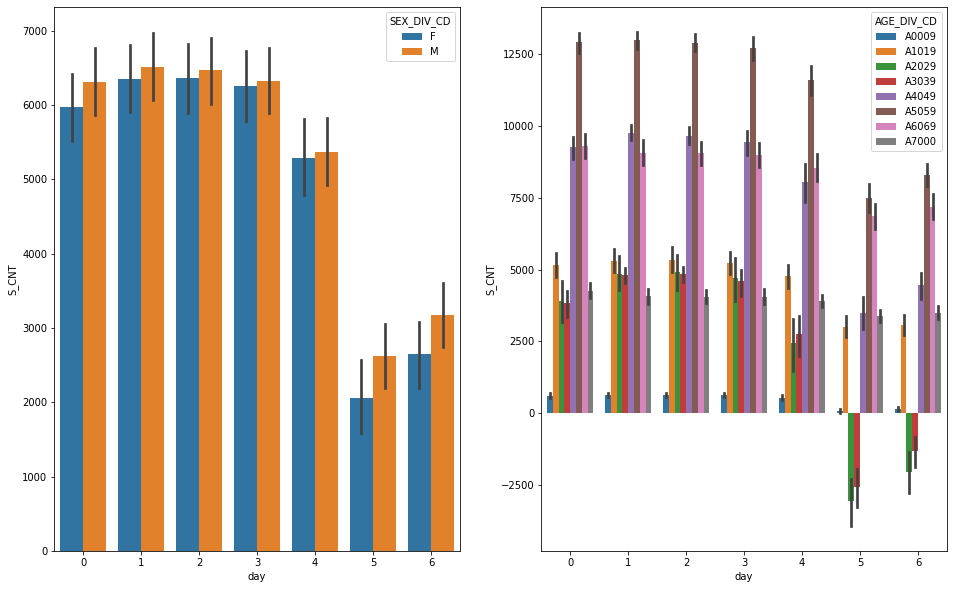

In [197]:
fig, (ax1,ax2)= plt.subplots(nrows=1, ncols=2,figsize=(16,10))
sns.barplot(data=kt_file[2][3], x='day', hue='SEX_DIV_CD', y='S_CNT',ax=ax1)
sns.barplot(data=kt_file[2][3], x='day', hue='AGE_DIV_CD', y='S_CNT',ax=ax2)

In [198]:
kt_file[2][3].query('SEX_DIV_CD == "M"')['S_CNT'].sum() - kt_file[2][3].query('SEX_DIV_CD == "F"')['S_CNT'].sum()


581523

### 요일별 S_CNT (I_CNT - O_CNT) 및 요일별, 연령대별 S_CNT (I_CNT - O_CNT) 
전체적으로 남자 방문객이 많은 편, 주말에는 남녀의 격차가 더 커지는 편

20~30 대

### 주별 / 성별, 연령대별

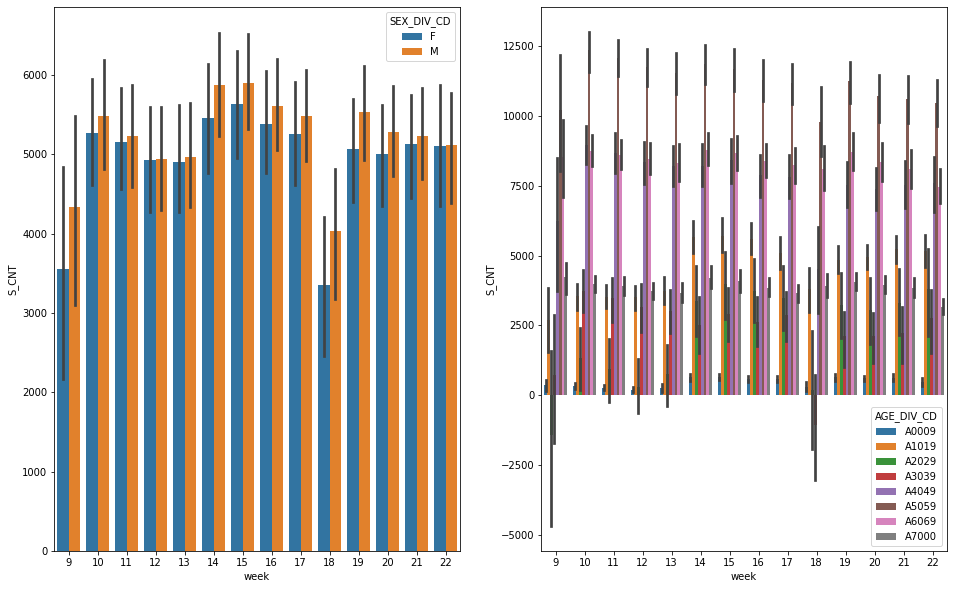

In [202]:
### 주별 / 성별, 연령대별

fig, (ax1,ax2)= plt.subplots(nrows=1, ncols=2,figsize=(16,10))
sns.barplot(data = kt_file[2][3], x = 'week', hue='SEX_DIV_CD', y='S_CNT',ax=ax1)
sns.barplot(data = kt_file[2][3], x = 'week', hue='AGE_DIV_CD', y='S_CNT',ax=ax2)


### 월별 / 성별, 연령대별

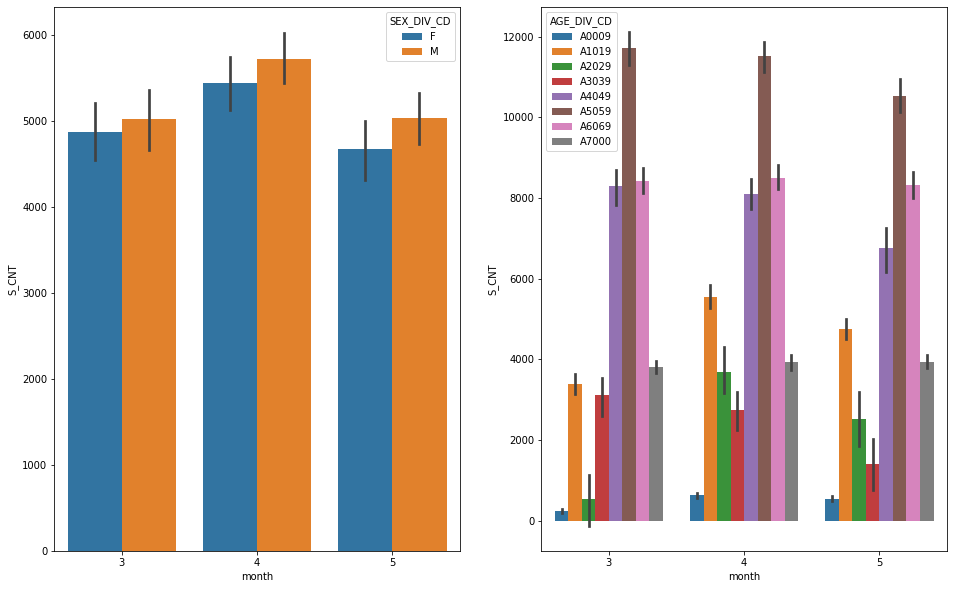

In [203]:
### 주별 / 성별, 연령대별

fig, (ax1,ax2)= plt.subplots(nrows=1, ncols=2,figsize=(16,10))
sns.barplot(data = kt_file[2][3], x = 'month', hue='SEX_DIV_CD', y='S_CNT',ax=ax1)
sns.barplot(data = kt_file[2][3], x = 'month', hue='AGE_DIV_CD', y='S_CNT',ax=ax2)

### 연도별/ 성별, 연령대별

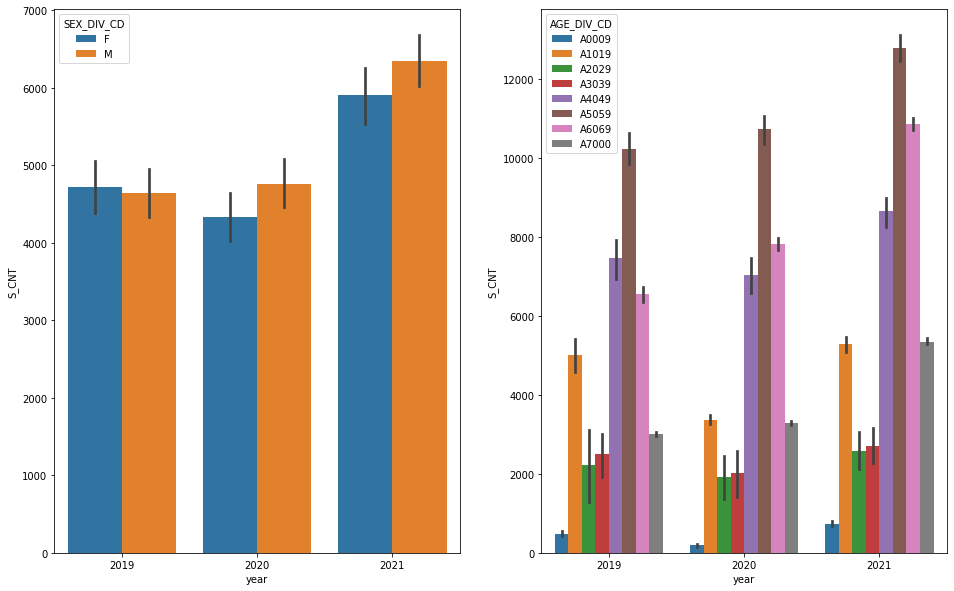

In [204]:
### 주별 / 성별, 연령대별

fig, (ax1,ax2)= plt.subplots(nrows=1, ncols=2,figsize=(16,10))
sns.barplot(data = kt_file[2][3], x = 'year', hue='SEX_DIV_CD', y='S_CNT',ax=ax1)
sns.barplot(data = kt_file[2][3], x = 'year', hue='AGE_DIV_CD', y='S_CNT',ax=ax2)

2019년에는 여성 방문객이 더 많지만, 이후 2020년 2021년에는 남성 방문객이 더 많아짐


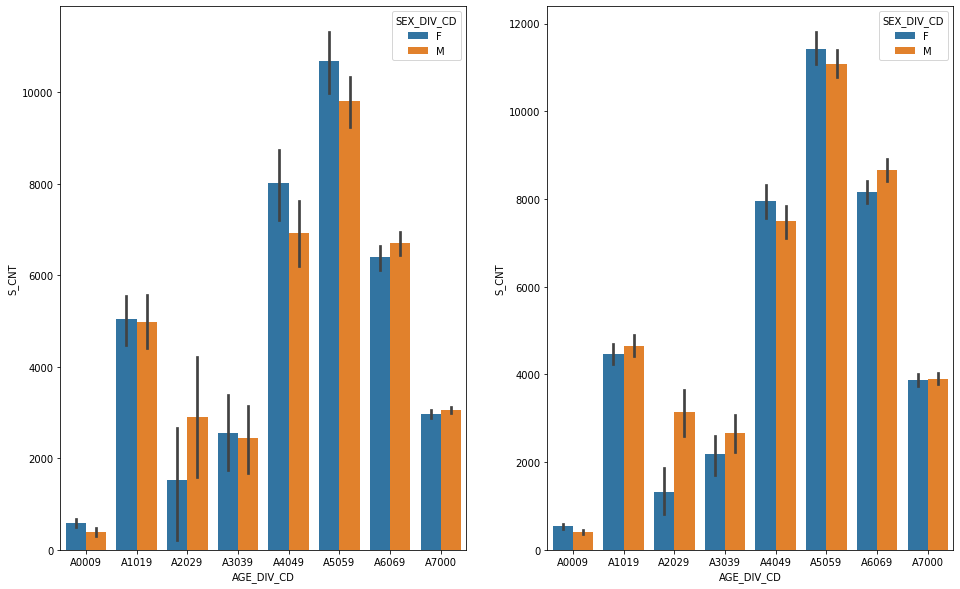

In [207]:
fig, (ax1,ax2)= plt.subplots(nrows=1, ncols=2,figsize=(16,10))
sns.barplot(data = kt_file[2][3].query('year == 2019'), x='AGE_DIV_CD', y = 'S_CNT', hue='SEX_DIV_CD', ax=ax1)
sns.barplot(data = kt_file[2][3], x='AGE_DIV_CD', y = 'S_CNT', hue='SEX_DIV_CD', ax=ax2)

2019년 연령대별 성별별 방문객/ 전체 년도별 연령대별 성별별 방문객  

10대, 30대, 40대 여성 방문객의 차이 때문인 것으로 보임.


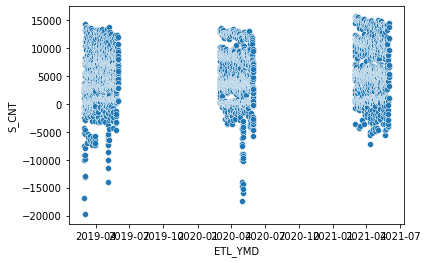

In [213]:
sns.scatterplot(data = kt_file[2][3], y='S_CNT', x='ETL_YMD')

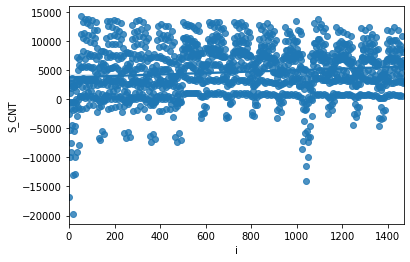

In [220]:
sdf = kt_file[2][3].copy()
sdf['i'] = sdf.index
sns.regplot(data = sdf.query('year==2019'), y='S_CNT', x='i')